In [1]:
import copia
from copia.simulation import WrightFisher, simulate_collection

In [2]:
n_agents = 1000
model = WrightFisher(n_agents, 1, warmup=1000, random_state=None)

In [5]:
beta, mu = 0.0, 0.01
fd = model(beta, mu)
fd = copia.utils.bincount(fd)

fd

array([71, 10, 77, 33,  4, 21,  6, 21, 39,  9, 97, 28,  4, 17, 45, 15, 28,
        5, 38,  5,  8, 29, 47,  7, 19,  3, 47,  1,  2, 64, 12,  4,  5,  2,
       22,  4, 16,  1, 19,  3,  4,  6,  4,  4, 15,  5,  4,  3,  4,  2,  2,
        1,  6,  3,  5,  2,  1,  3,  2,  4,  5, 10,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  2])

In [12]:
survival_rate = 0.99
sample = simulate_collection(fd, int(survival_rate * fd.sum()), 0.0)
sample

array([71, 10, 77, 33,  4, 21,  6, 21, 39,  9, 97, 28,  4, 17, 45, 15, 28,
        5, 38,  5,  8, 29, 47,  7, 19,  3, 47,  0,  2, 64, 12,  3,  5,  2,
       22,  4, 16,  0, 19,  3,  3,  6,  4,  4, 15,  5,  3,  3,  4,  1,  2,
        0,  6,  3,  5,  2,  1,  3,  2,  4,  5, 10,  1,  1,  2,  1,  0,  1,
        0,  1,  1,  1,  1,  1,  0,  1,  2])

<AxesSubplot:title={'center':'Estimate: bootstrap values (KDE and quartiles)'}>

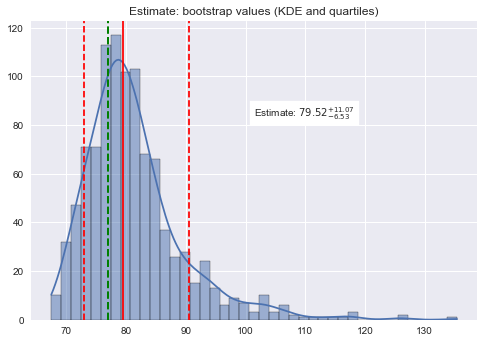

In [13]:
estimate = copia.diversity(sample, method='chao1', CI=True, disable_pb=True)
empirical = copia.diversity(fd, method='empirical')
copia.plot.density(estimate, empirical)

In [217]:
import random
import numpy as np

n_agents = 1000
model = WrightFisher(n_agents, 1, warmup=1000, random_state=None)

beta, mu = 0.0, 0.01
fd = model(beta, mu)
fd = copia.utils.bincount(fd)
empirical = copia.diversity(fd, method='empirical')
beta = np.linspace(-0.5, 0.5, 100)
n_samples = 100
survival_rate = 0.2
results = np.zeros((100, 3))

for i, b in enumerate(beta):
    tmp = np.zeros(n_samples)
    for j in range(n_samples):
        sample = simulate_collection(fd, int(survival_rate * fd.sum()), beta=b)
        estimate = copia.diversity(sample, method='chao1')
        tmp[j] = estimate
    lci, estimate, uci = copia.stats.quantile(tmp, [0.05, 0.5, 0.95])
    results[i] = [lci, estimate, uci]

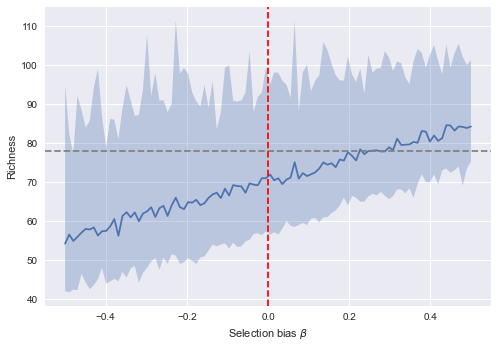

In [218]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
lci, estimate, uci = results.T
ax.plot(beta, estimate, color=f"C0")
ax.fill_between(beta, lci, uci, alpha=0.3)
ax.set(ylabel="Richness", xlabel="Selection bias $\\beta$")
ax.axhline(empirical, ls="--", color="gray")
ax.axvline(0.0, ls="--", color="red")

In [221]:
import random
import numpy as np

n_samples = 100
survival_rate = np.linspace(0.001, 0.999, 100)
results = np.zeros((100, 3))

for i, r in enumerate(survival_rate):
    tmp = np.zeros(n_samples)
    for j in range(n_samples):
        sample = simulate_collection(fd, int(r * fd.sum()), beta=0.0)
        estimate = copia.diversity(sample, method='chao1')
        tmp[j] = estimate
    lci, estimate, uci = copia.stats.quantile(tmp, [0.05, 0.5, 0.95])
    results[i] = [lci, estimate, uci]

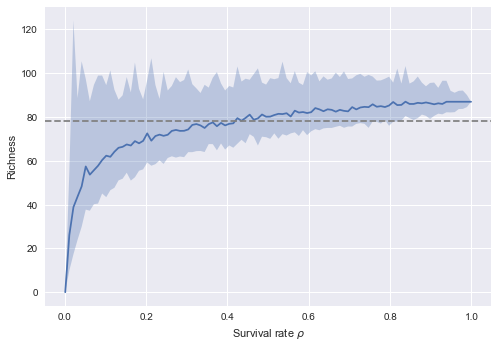

In [222]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
lci, estimate, uci = results.T
ax.plot(survival_rate, estimate, color=f"C0")
ax.fill_between(survival_rate, lci, uci, alpha=0.3)
ax.set(ylabel="Richness", xlabel="Survival rate $\\rho$")
ax.axhline(empirical, ls="--", color="gray")